In [ ]:
# Data processing
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# sklearn Machine learning library
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le            # label encoder
from sklearn.model_selection import train_test_split             # train & test split
from sklearn.preprocessing import RobustScaler as rbScaler         # robust scaler
from sklearn.ensemble import VotingClassifier as voClassifier        # voting
from sklearn.tree  import DecisionTreeClassifier as dtClassifier      # decision tree
from sklearn.ensemble import AdaBoostClassifier as adabClassifier      # adaboosting
from sklearn.neighbors import KNeighborsClassifier as knnClassifier     # knn
from sklearn.ensemble import RandomForestClassifier as rfClassifier     # random forest
from sklearn.linear_model import LogisticRegression as lgrClassifier    # logistic regression
from sklearn.ensemble import GradientBoostingClassifier as gbClassifier   # gbm
from sklearn.model_selection import GridSearchCV               # grid search


In [ ]:
# Other machine learning classification algorithms library
from lightgbm import LGBMClassifier as lgbClassifier            # light gbm
from xgboost import XGBClassifier                      # xgboosting    # catboosting

In [ ]:
# visualization
import matplotlib.pyplot as plt

In [ ]:
# Data Import
# Read data
data = pd.read_csv("train.csv", encoding = "utf-8" , sep = ",", low_memory=False)
data.head()

In [ ]:
data.info() # View data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
data.describe() # View descriptive statistics of the data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
data.describe(include="object") # View descriptive statistics of the data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [ ]:
data.isnull().sum() # View missing values

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<Figure size 1800x600 with 0 Axes>

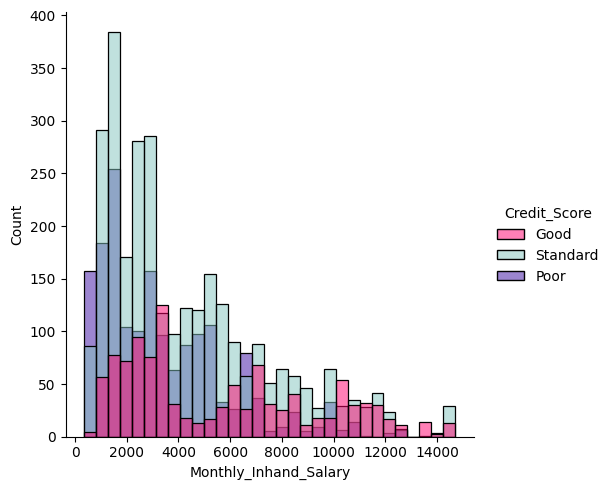

<Figure size 1800x600 with 0 Axes>

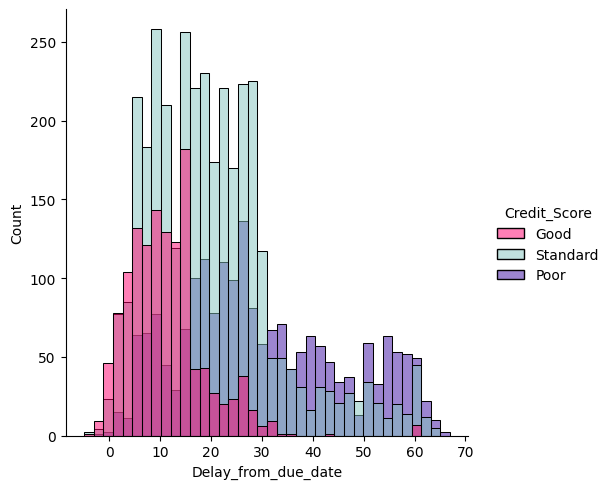

<Figure size 1800x600 with 0 Axes>

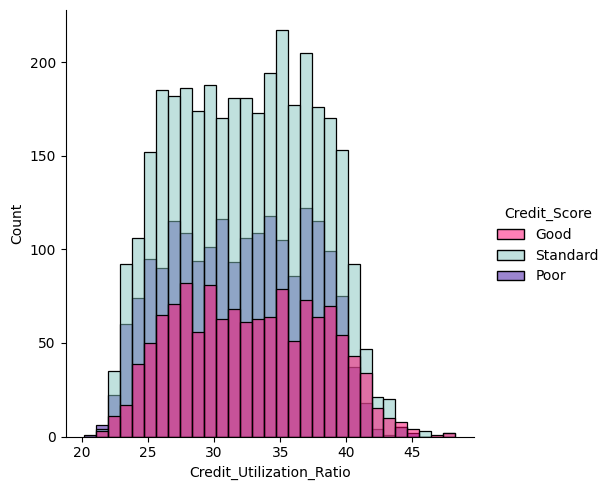

In [ ]:
# Look at the relationship between the following three categories of variables and credit scores
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

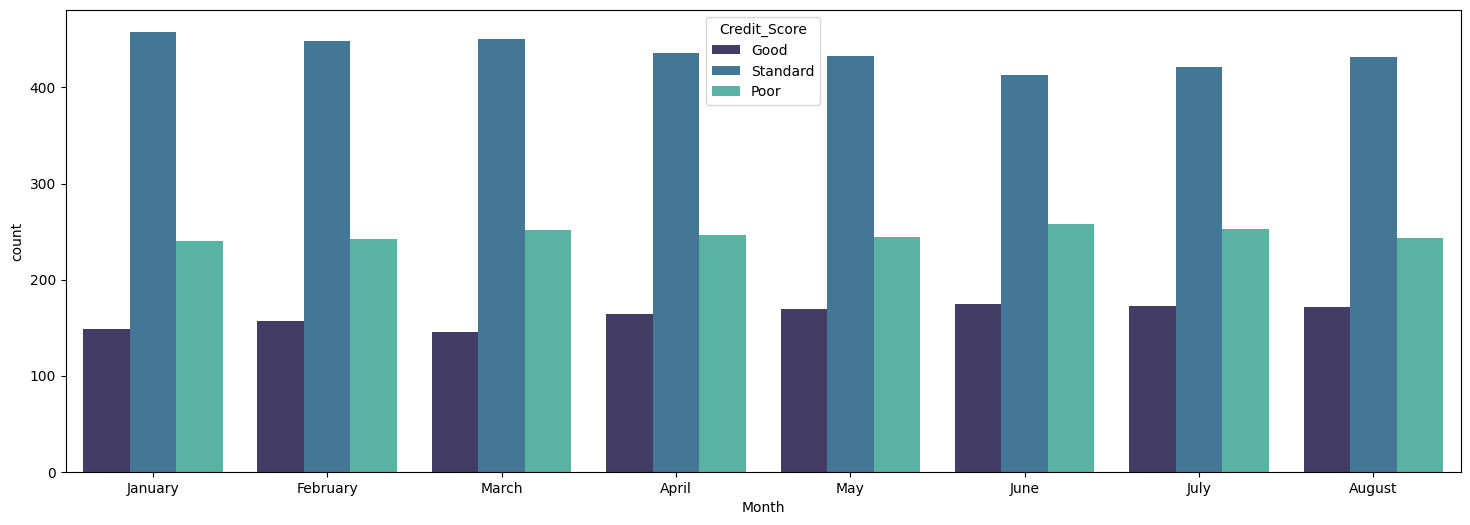

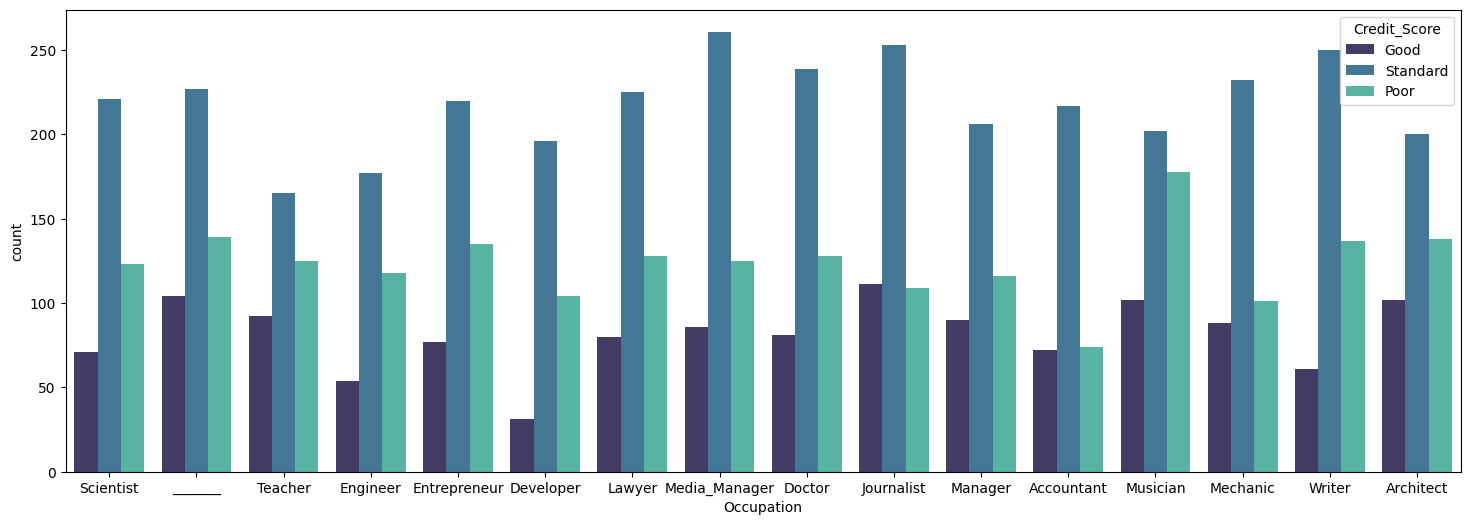

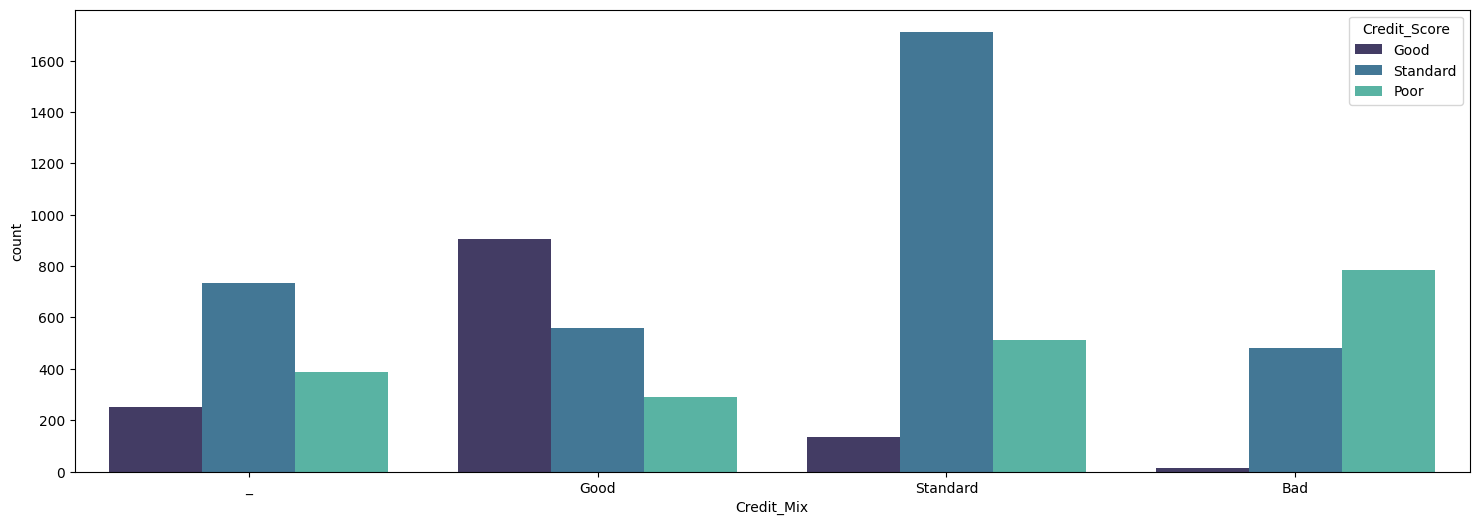

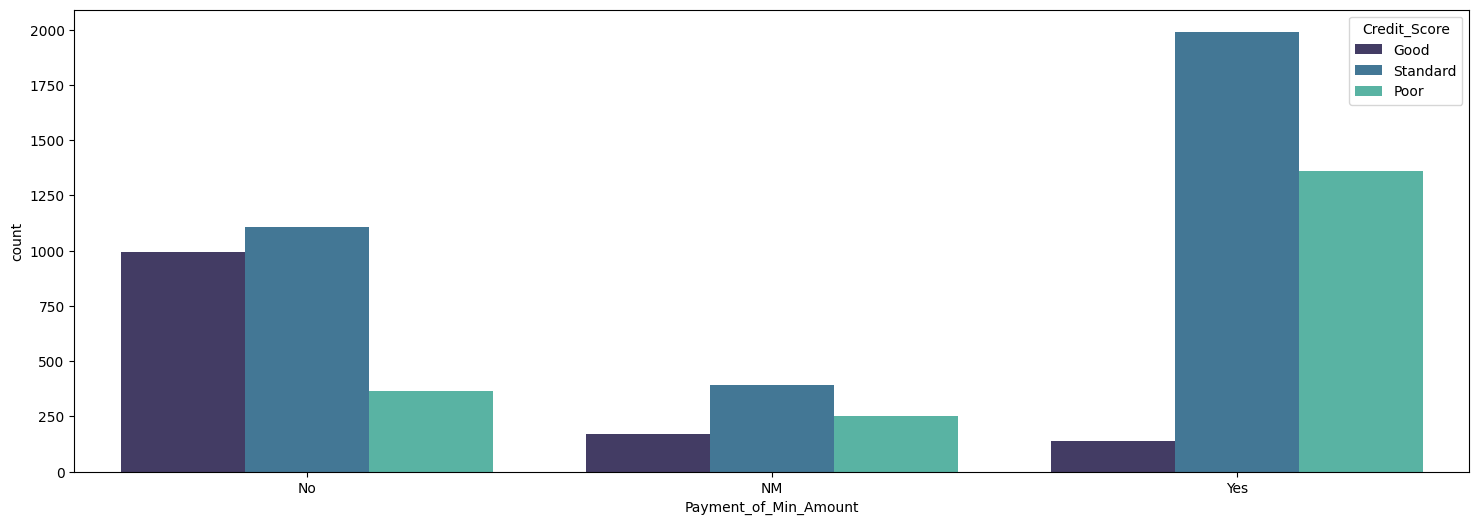

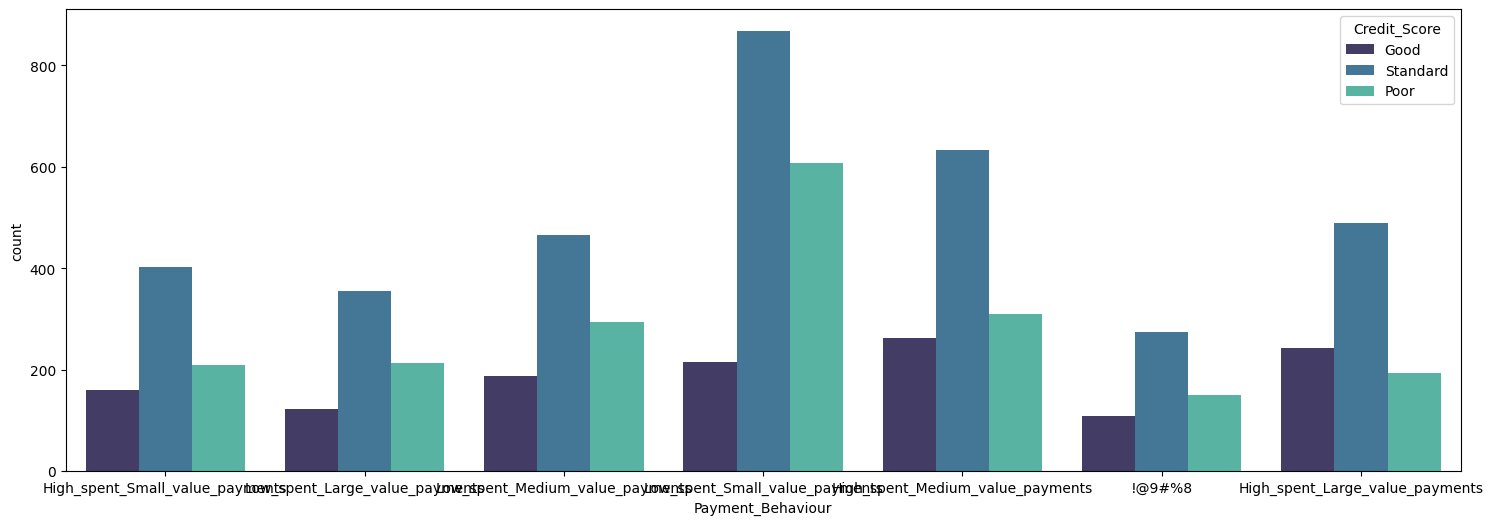

In [ ]:
# View the relationship between object type variables and credit scores
objCols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=data, palette="mako", hue="Credit_Score")
    plt.show()

In [ ]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
pd.set_option('mode.chained_assignment',None)

for row in rows:
    data[row] = data[row].str.replace(r'_+', '')

for row in rows:
    data[row] = pd.to_numeric(data[row], errors='coerce')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6772 non-null   object 
 1   Customer_ID               6772 non-null   object 
 2   Month                     6772 non-null   object 
 3   Name                      6121 non-null   object 
 4   Age                       6772 non-null   int64  
 5   SSN                       6772 non-null   object 
 6   Occupation                6772 non-null   object 
 7   Annual_Income             6772 non-null   float64
 8   Monthly_Inhand_Salary     5772 non-null   float64
 9   Num_Bank_Accounts         6771 non-null   float64
 10  Num_Credit_Card           6771 non-null   float64
 11  Interest_Rate             6771 non-null   float64
 12  Num_of_Loan               6771 non-null   float64
 13  Type_of_Loan              5931 non-null   object 
 14  Delay_fr

<ipython-input-8-5f9670dcc6cf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[row] = data[row].str.replace(r'_+', '')


Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Figure size 1200x800 with 0 Axes>

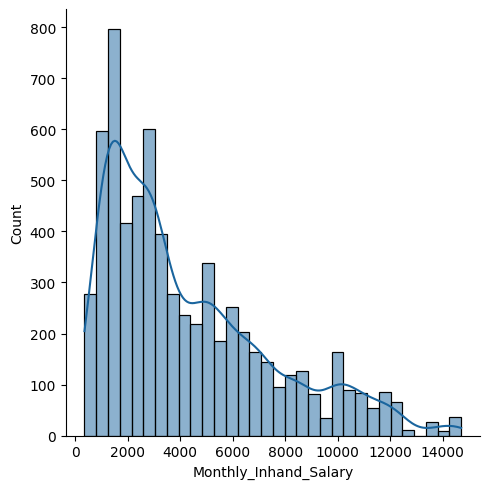

In [ ]:
# Process missing values in the data
data.dropna(thresh=26, inplace=True)

data.isnull().sum()

data = data[['Month', 'Age', 'Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

# Handle Monthly_Inhand_Salary missing value
fill_list = data['Monthly_Inhand_Salary'].dropna().tolist()
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

plt.figure(figsize=(12,8))
sns.displot(data=data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

# Handle Type_of_Loan missing value
fill_list = data['Type_of_Loan'].dropna().tolist()
data['Type_of_Loan'] = data['Type_of_Loan'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

# Handle Num_of_Delayed_Paymen missing value
fill_list = data['Num_of_Delayed_Payment'].dropna().tolist()
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

# Handle Changed_Credit_Limit missing value
fill_list = data['Changed_Credit_Limit'].dropna().tolist()
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

# Handle Num_Credit_Inquiries missing value
fill_list = data['Num_Credit_Inquiries'].dropna().tolist()
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

# Handle Credit_History_Age missing value
fill_list = data['Credit_History_Age'].dropna().tolist()
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

# Handle Amount_invested_monthly missing value
fill_list = data['Amount_invested_monthly'].dropna().tolist()
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

# Handle Monthly_Balance missing value
fill_list = data['Monthly_Balance'].dropna().tolist()
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

data.dropna(thresh=24, inplace=True)
data.isnull().sum()


#  (a) Data Virsualization

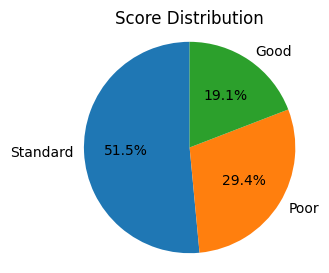

In [ ]:
# Count the occurrences of each category
category_counts = data['Credit_Score'].value_counts()

# Plot the pie chart
plt.figure(figsize=(3,3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Score Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

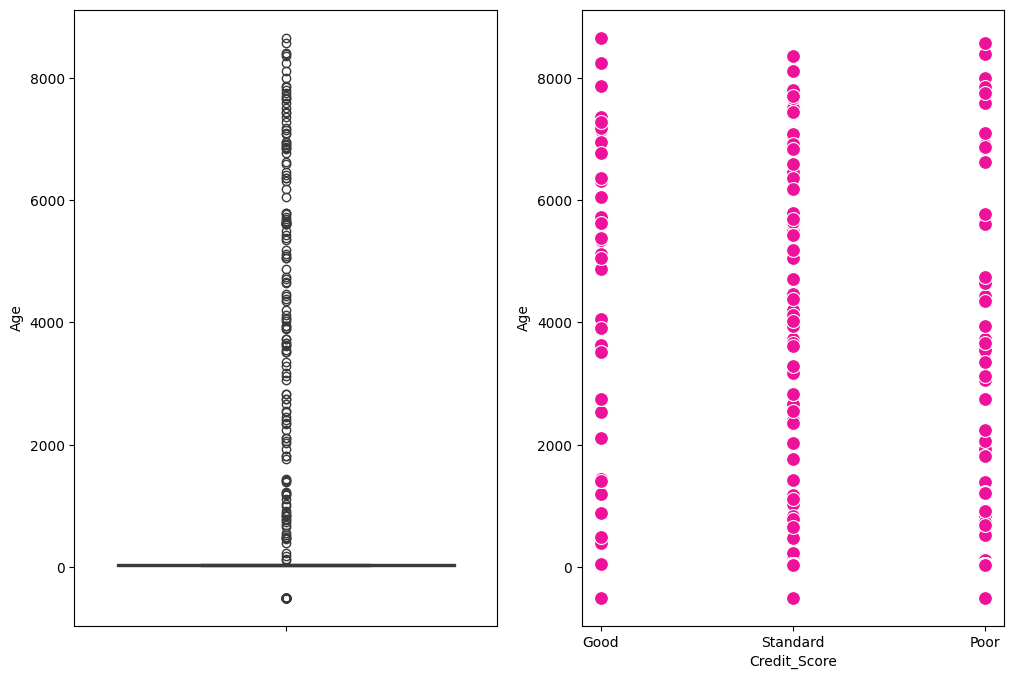

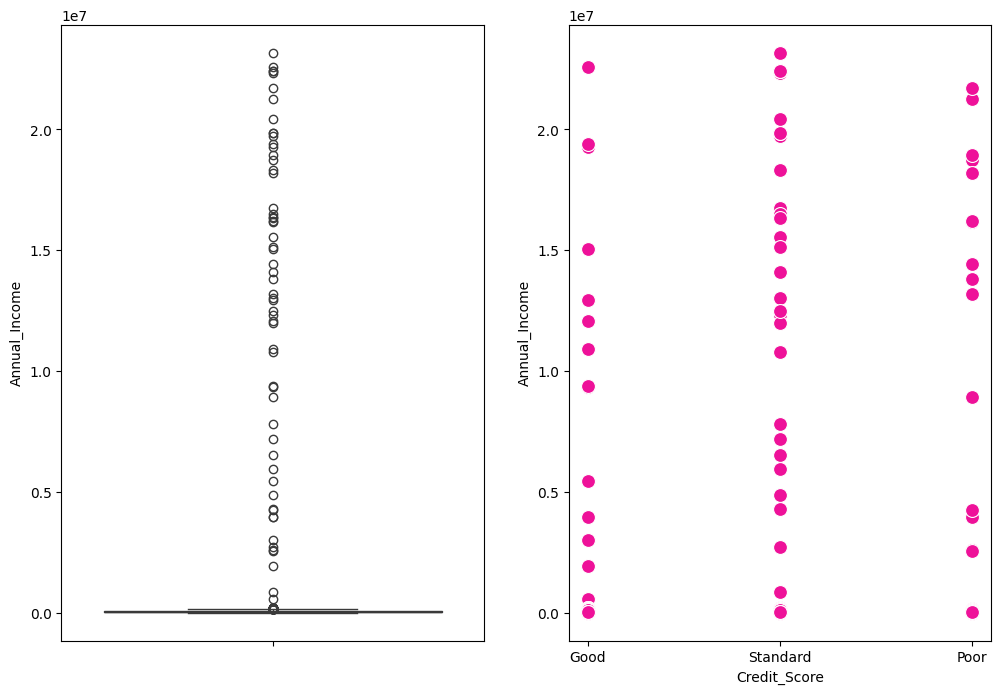

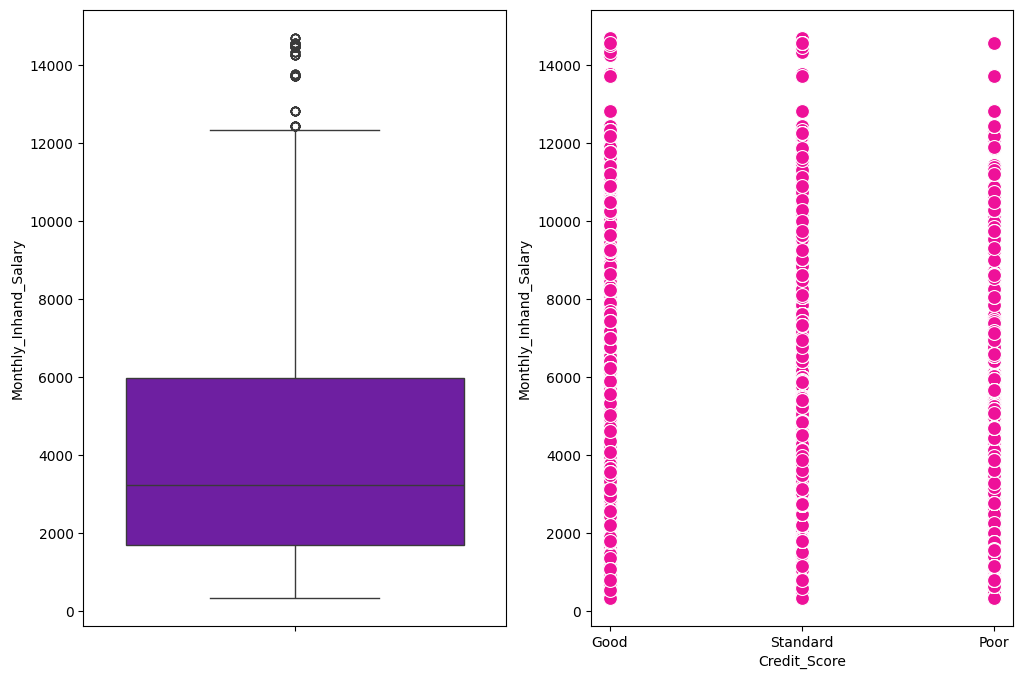

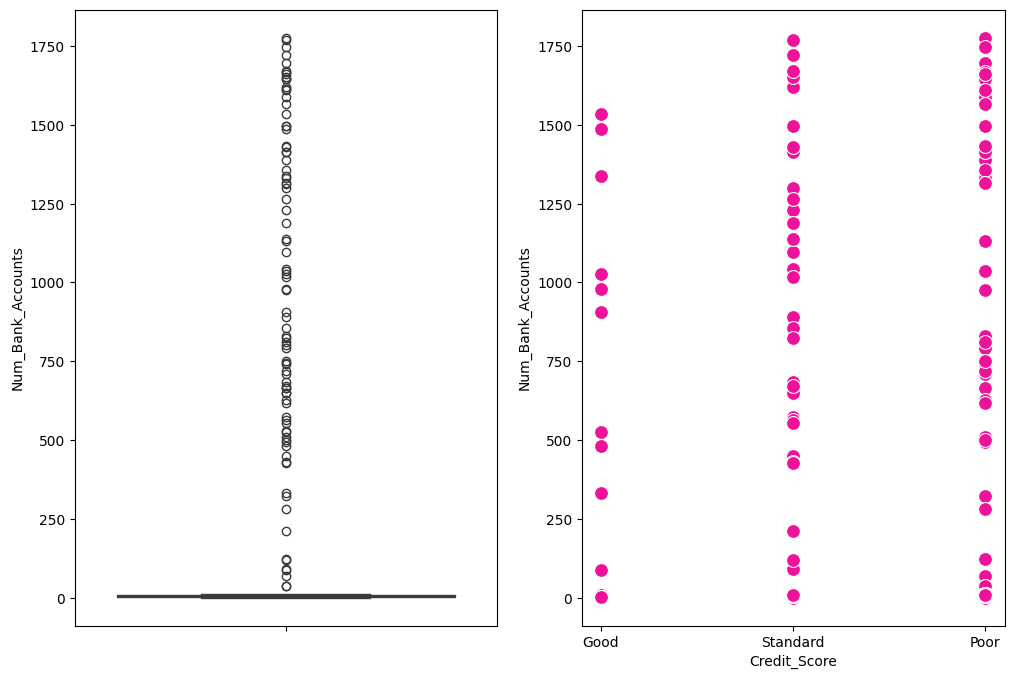

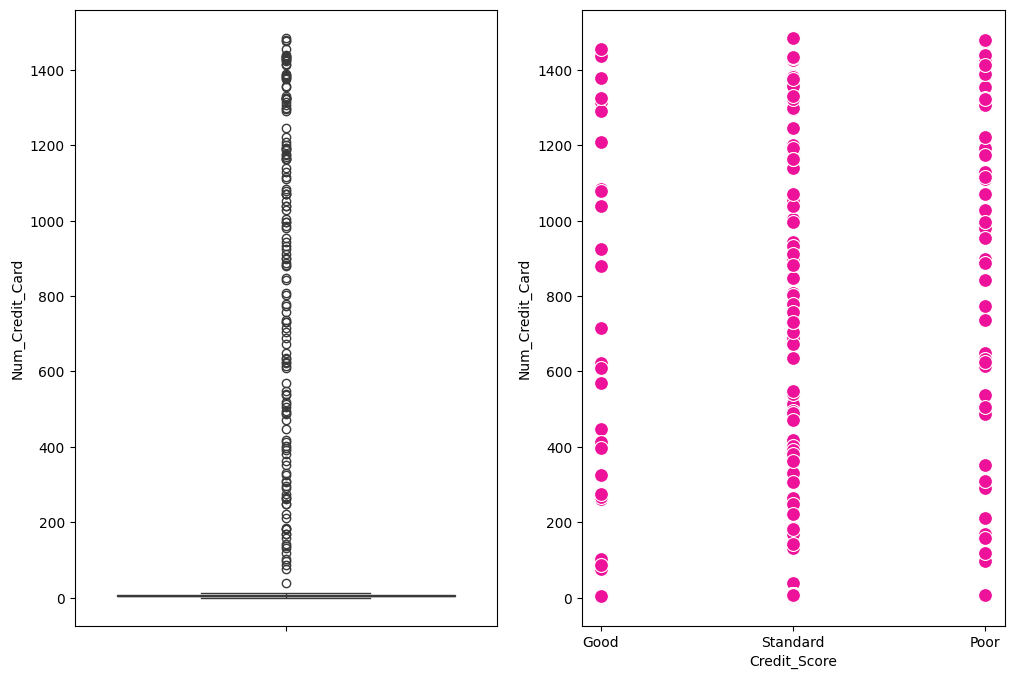

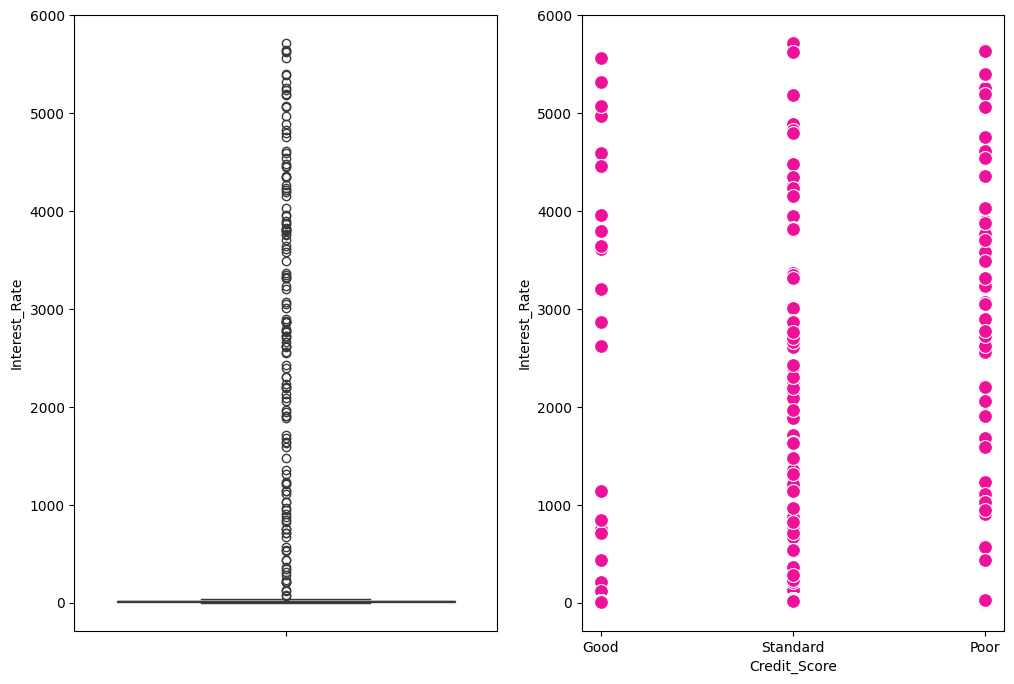

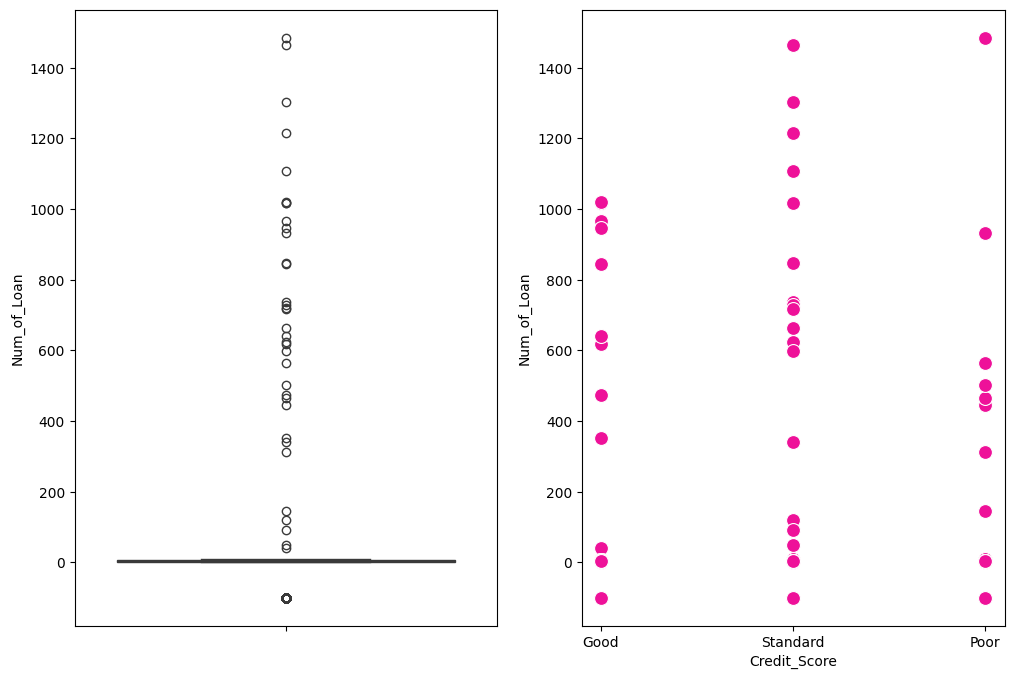

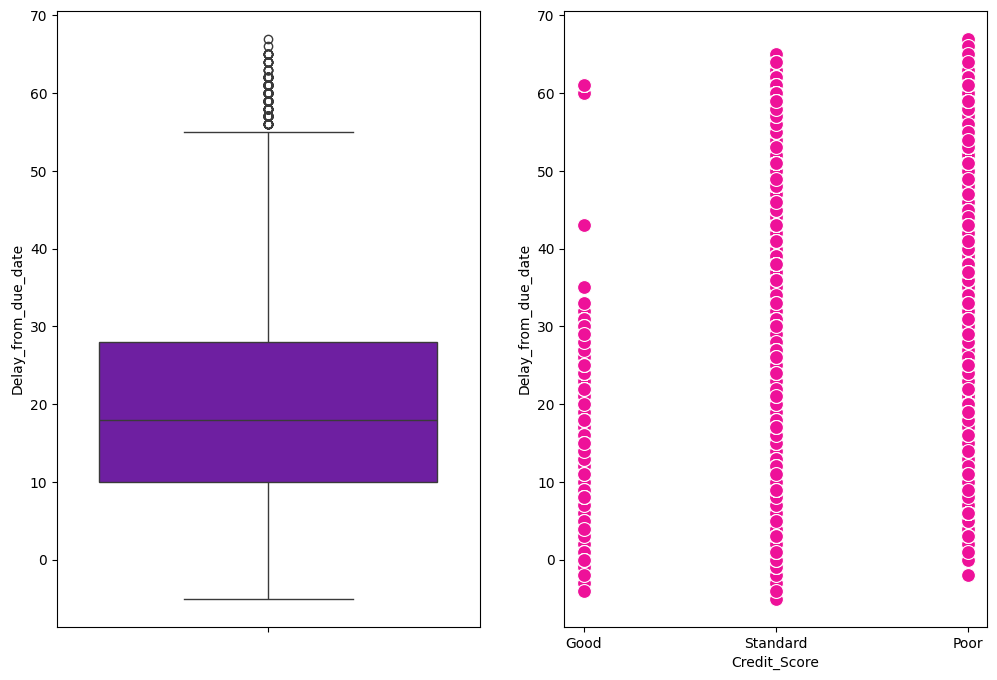

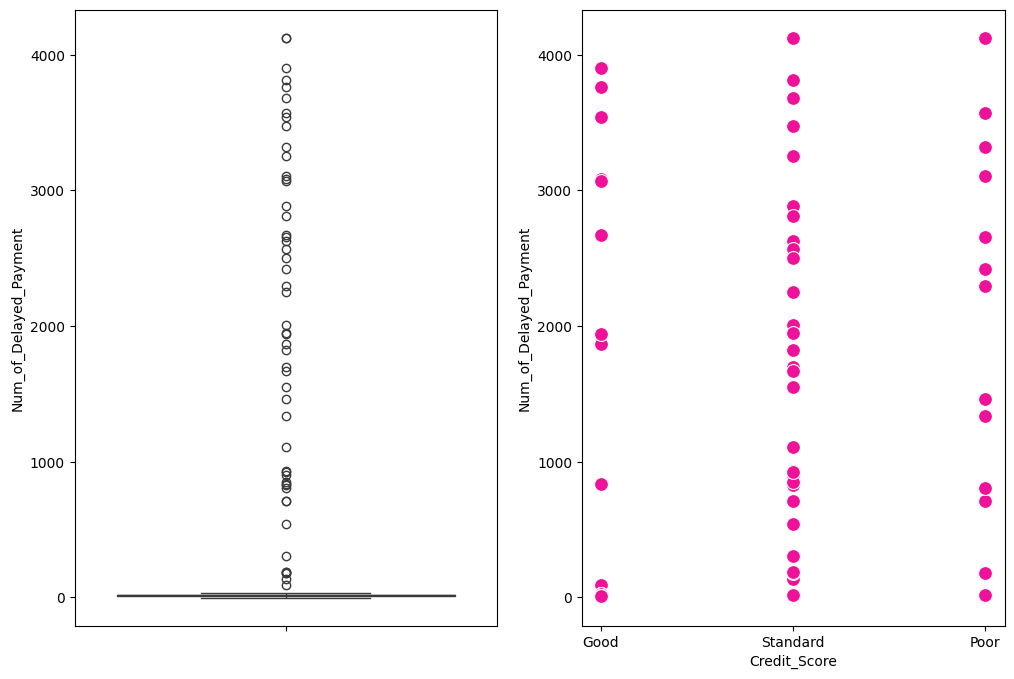

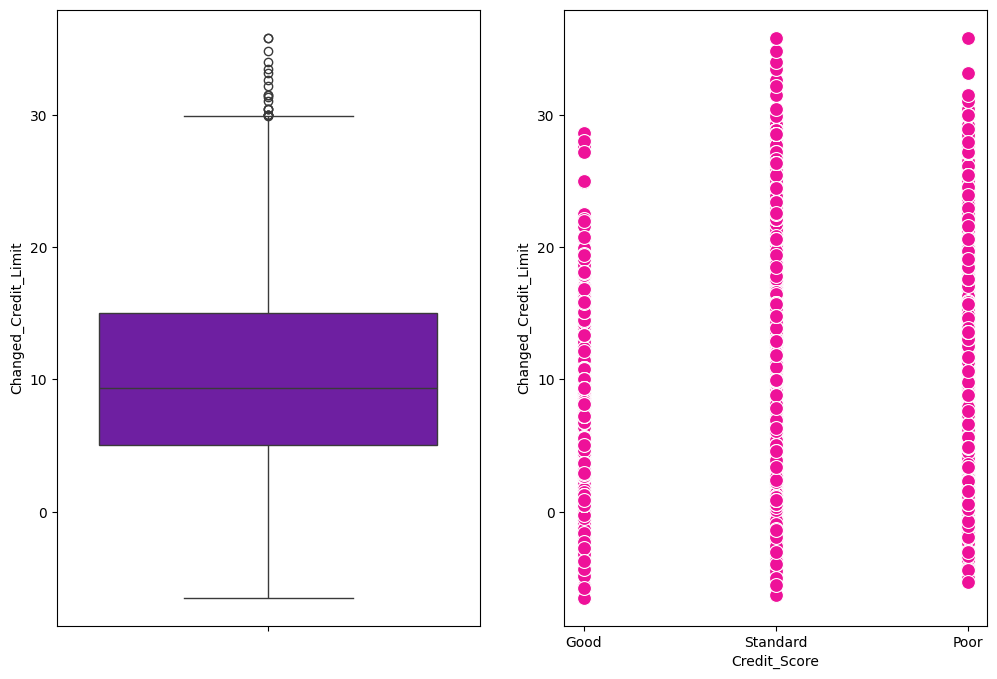

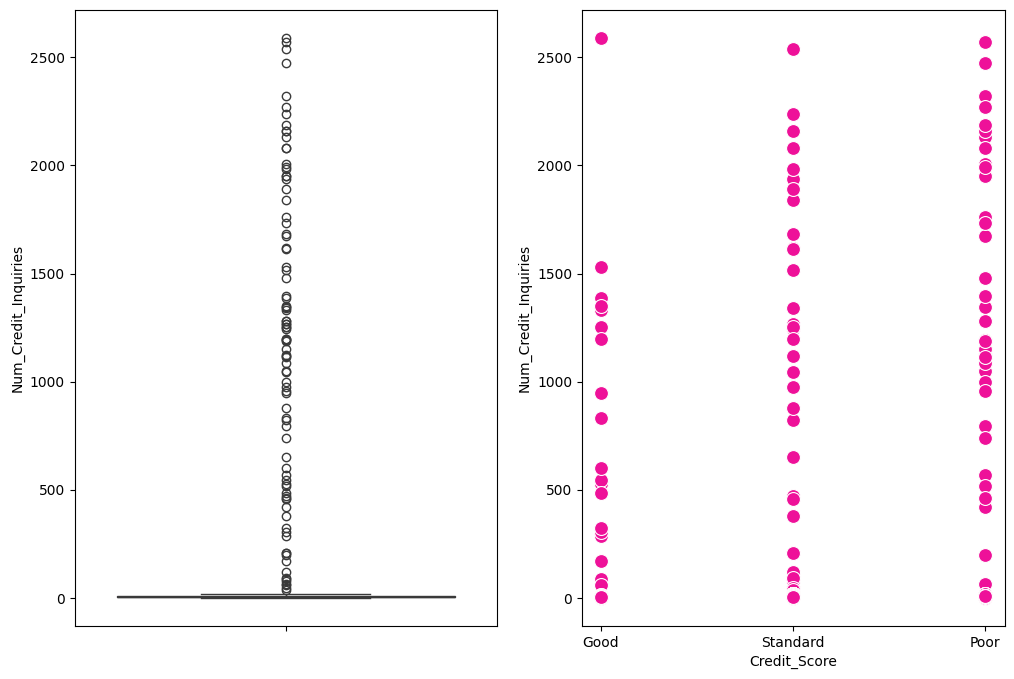

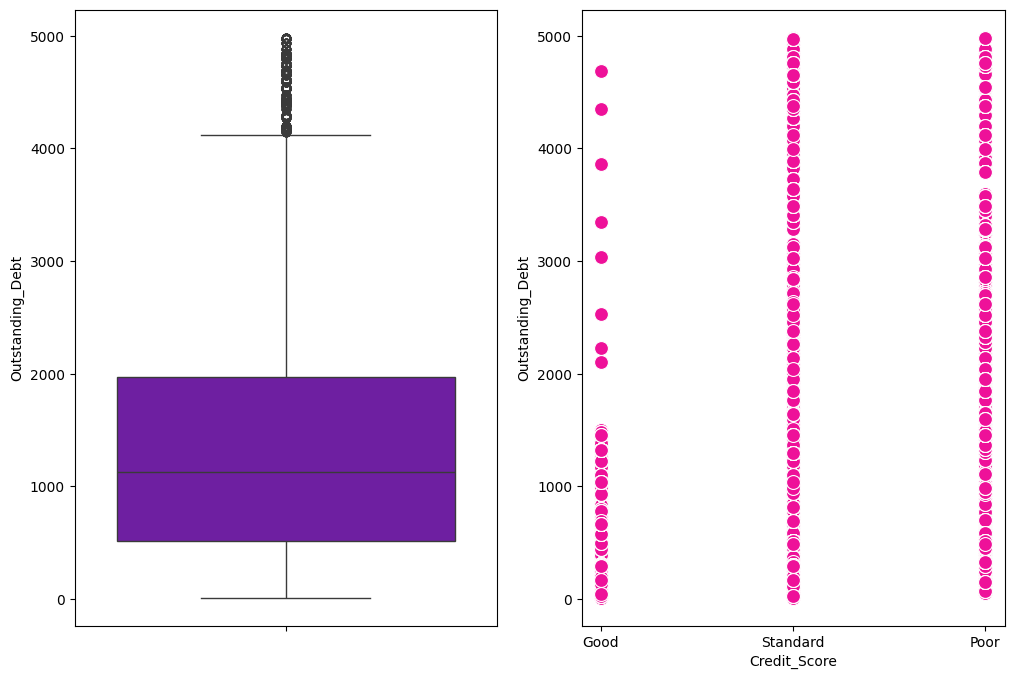

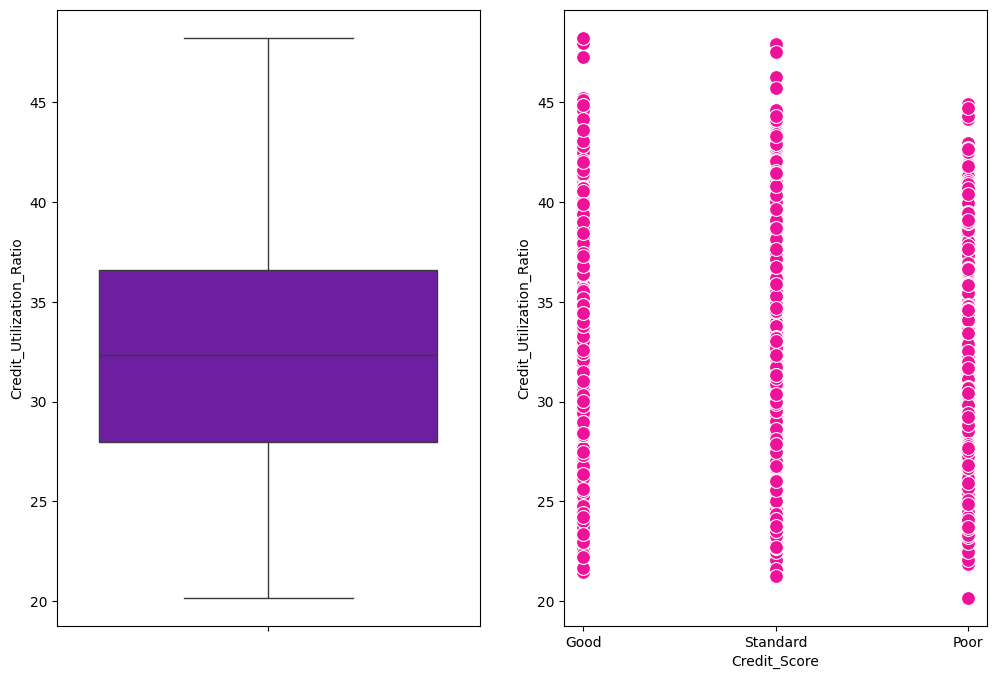

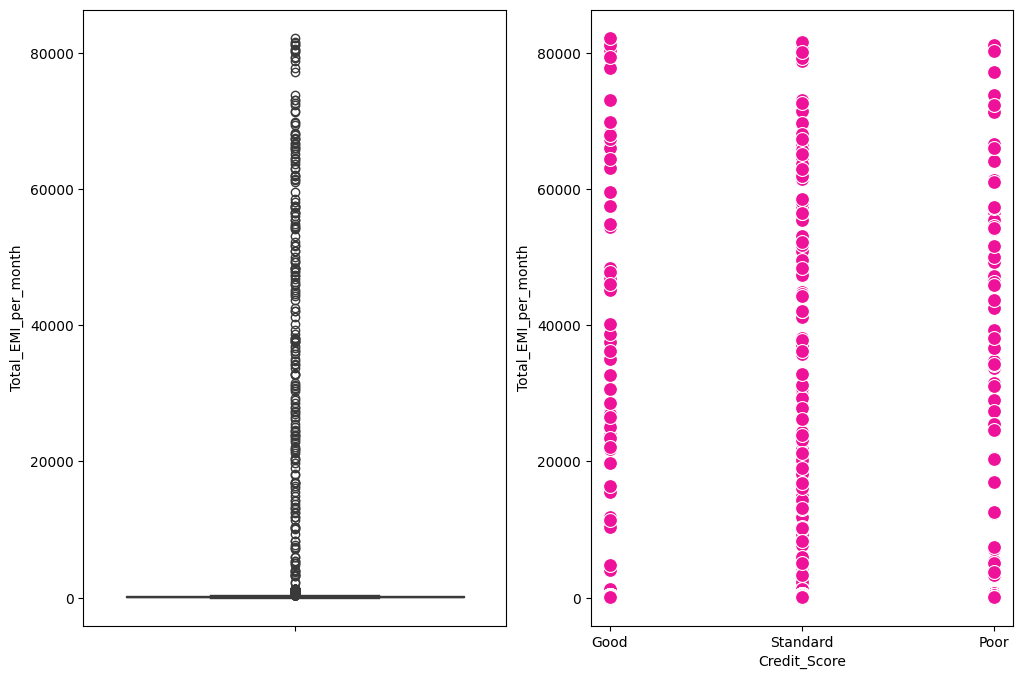

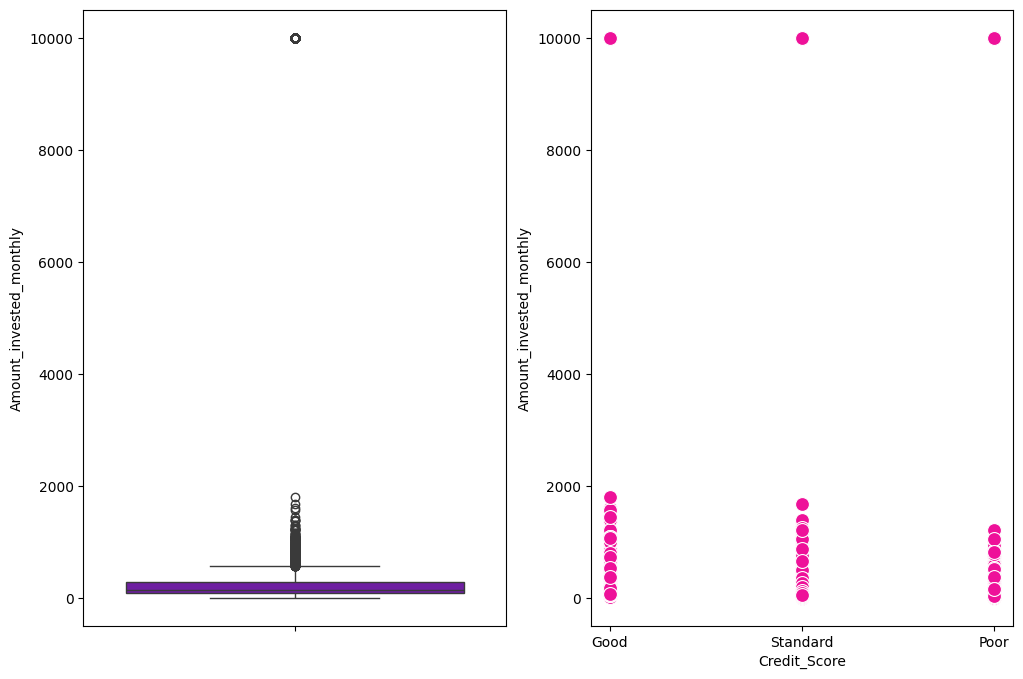

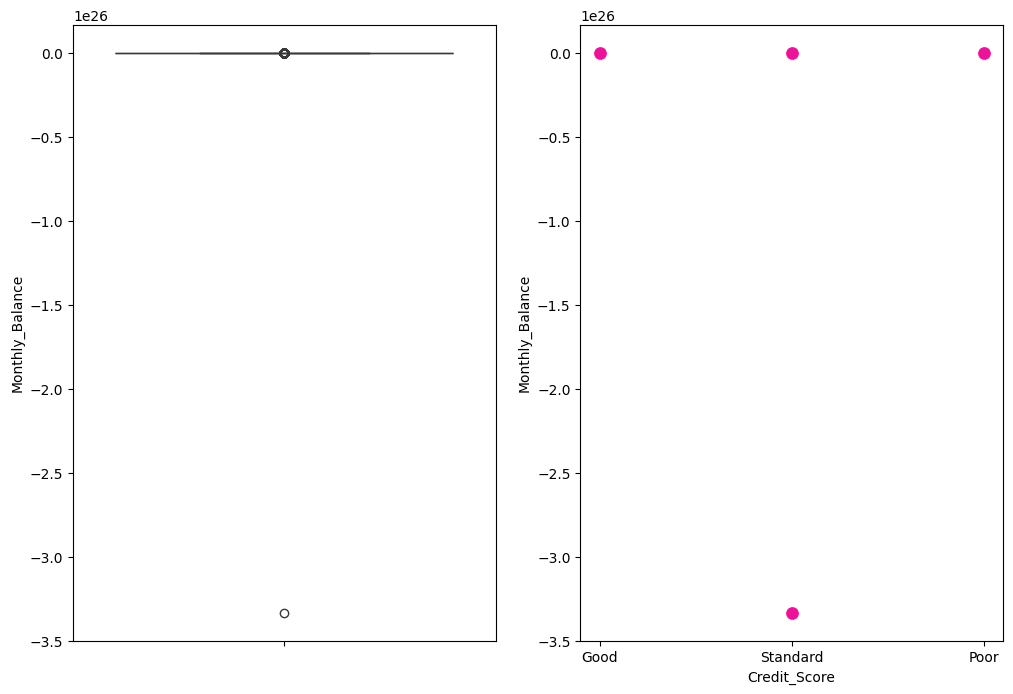

In [ ]:
# Handle outliers in the data
numCols = data.select_dtypes([np.number]).columns
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=data,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

# Handle Age outliers
((data['Age'] <= 100) & (data['Age'] >= 0)).value_counts()
data = data[(data['Age'] <= 100) & (data['Age'] >= 0)]

# Handle Annual_Income outliers
(data['Annual_Income'] <= 300000).value_counts()
data = data[(data['Annual_Income'] <= 300000)]

# Handle Monthly_Inhand_Salary outliers
(data['Monthly_Inhand_Salary'] <= 15000).value_counts()
data = data[(data['Monthly_Inhand_Salary'] <= 15000)]

# Handle Num_Bank_Accounts outliers
(data['Num_Bank_Accounts'] <= 750).value_counts()
data = data[(data['Num_Bank_Accounts'] <= 750)]

# Handle Num_Credit_Card outliers
(data['Num_Credit_Card'] <= 1000).value_counts()
data = data[(data['Num_Credit_Card'] <= 1000)]

# Handle the Interest_Rate outlier
(data['Interest_Rate'] <= 5000).value_counts()
data = data[(data['Interest_Rate'] <= 5000)]

# Handle Num_of_Loan outliers
(data['Num_of_Loan'] <= 1100).value_counts()
data = data[(data['Num_of_Loan'] <= 1100)]

# Handle the Delay_from_due_date outlier
(data['Delay_from_due_date'] <= 65).value_counts()
data = data[(data['Delay_from_due_date'] <= 65)]

# Handle the Num_of_Delayed_Payment outlier
(data['Num_of_Delayed_Payment'] <= 1000).value_counts()
data = data[(data['Num_of_Delayed_Payment'] <= 1000)]

# Handle the Changed_Credit_Limit outlier
(data['Changed_Credit_Limit'] <= 30).value_counts()
data = data[(data['Changed_Credit_Limit'] <= 30)]

# Handles Num_Credit_Inquiries outliers
(data['Num_Credit_Inquiries'] <= 2400).value_counts()
data = data[(data['Num_Credit_Inquiries'] <= 2400)]

# Handle the Outstanding_Debt outlier
(data['Outstanding_Debt'] <= 4950).value_counts()
data = data[(data['Outstanding_Debt'] <= 4950)]

# Handles the Credit_Utilization_Ratio outlier
(data['Credit_Utilization_Ratio'] <= 45).value_counts()
data = data[(data['Credit_Utilization_Ratio'] <= 45)]

# Handling the Total_EMI_per_month outlier
(data['Total_EMI_per_month'] <= 75000).value_counts()
data = data[(data['Total_EMI_per_month'] <= 75000)]

# Handle the Amount_invested_monthly outlier
(data['Amount_invested_monthly'] <= 9000).value_counts()

# Handle Monthly_Balance outlier
(data['Monthly_Balance'] > -1).value_counts()
data = data[(data['Monthly_Balance'] > -1)]

In [ ]:
# Feature engineering:analyzes data characteristics and correlations
data.select_dtypes(['object']).columns
Month_le = le()
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()
data['Month'] = Month_le.fit_transform(data['Month'])
data['Occupation'] = Occupation_le.fit_transform(data['Occupation'])
data['Type_of_Loan'] = Type_of_Loan_le.fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = Credit_Mix_le.fit_transform(data['Credit_Mix'])
data['Credit_History_Age'] = Credit_History_Age_le.fit_transform(data['Credit_History_Age'])
data['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = Credit_Score_le.fit_transform(data['Credit_Score'])

<Axes: >

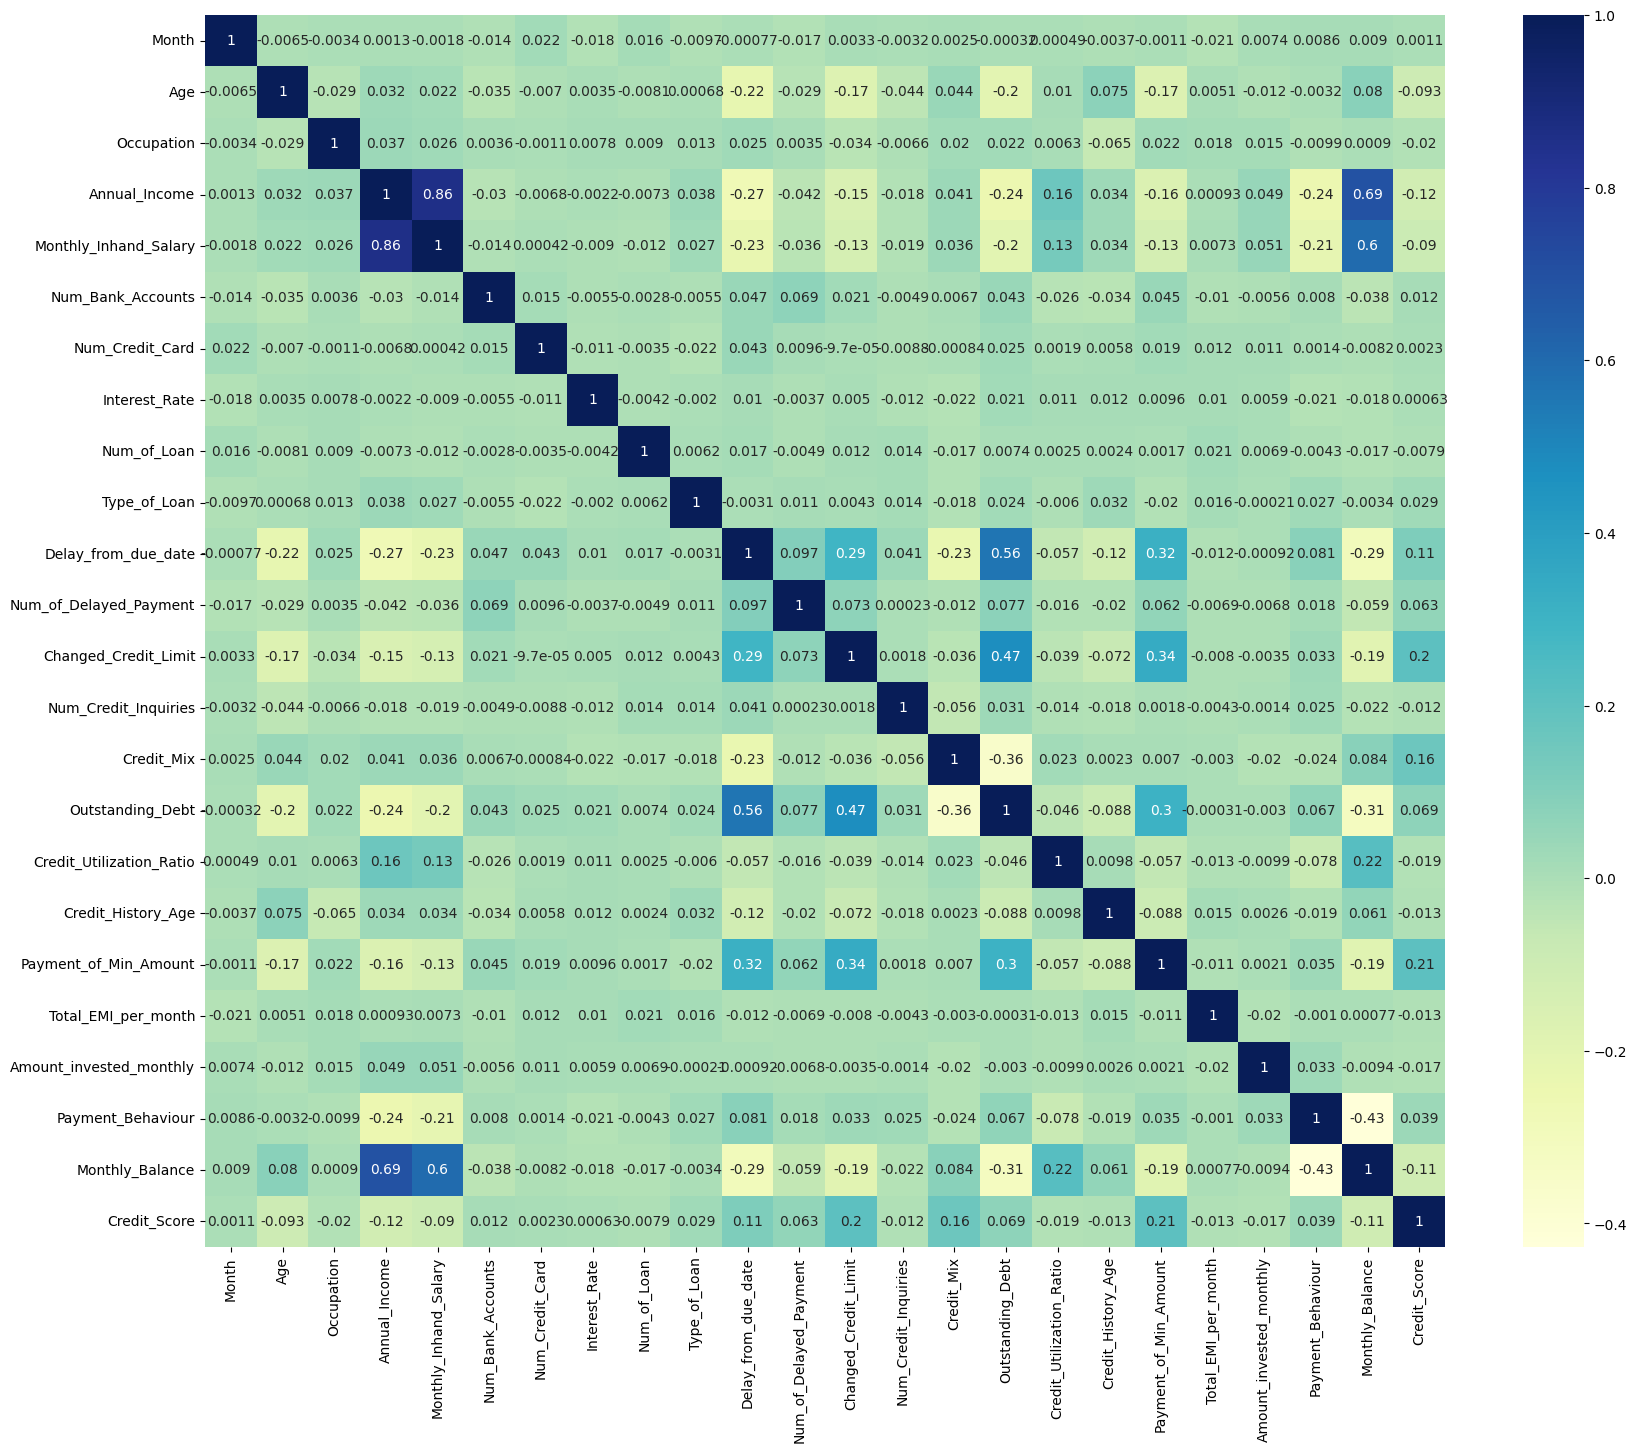

In [ ]:
# View feature correlation
plt.figure(figsize = (20,16))
sns.heatmap(data.corr() , annot = True , cmap = "YlGnBu")

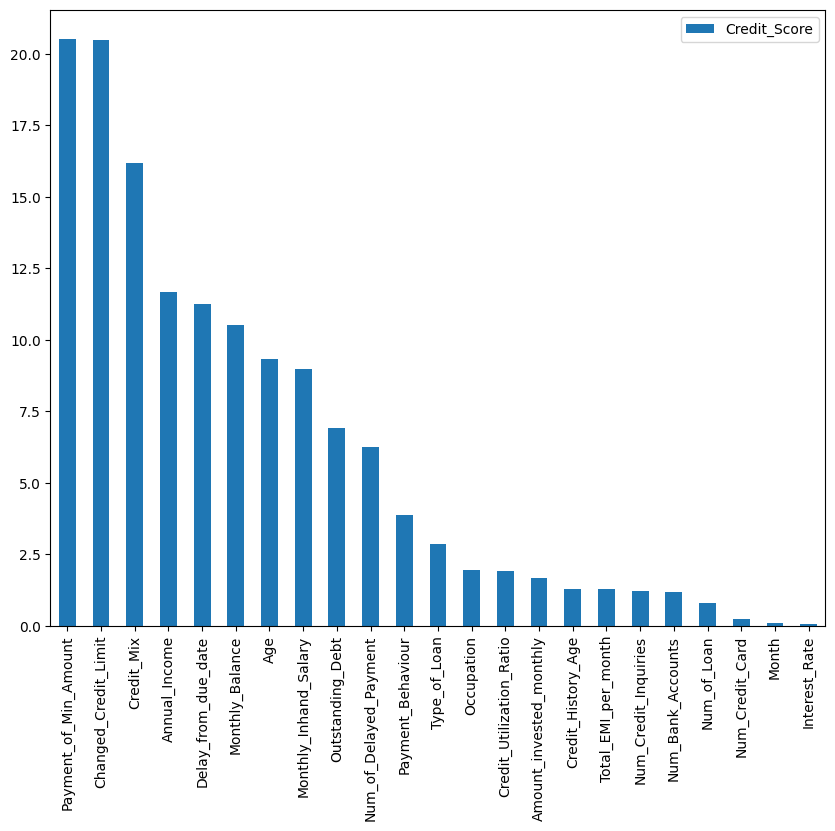

In [ ]:
###Feature selection
round(abs(data.corr()['Credit_Score']*100).sort_values(ascending=False), 2)
pd.DataFrame(abs(data.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))
mdf = data[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

In [ ]:
# Build training sets and test sets
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

In [ ]:
# Split the data set, split the training set and the feature set, split in 2:8 ratio
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)
[x_train.shape, y_train.shape]


[(4904, 14), (4904,)]

In [ ]:
### Data scaling
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(4904, 14), (1227, 14)]

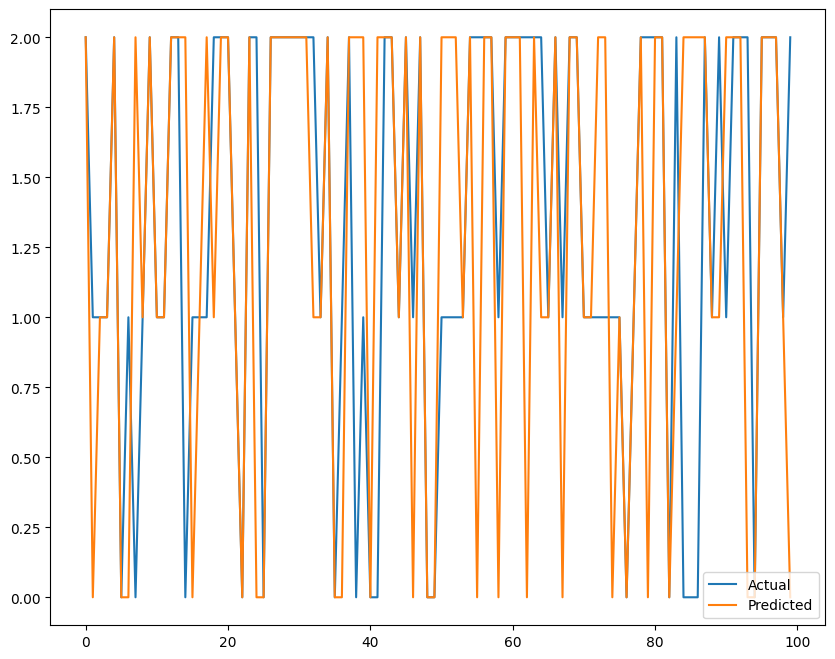

In [ ]:
# Build a model
# Decision tree
dt = dtClassifier(max_features=14, max_depth=8)
dt.fit(x_train , y_train)
dt_score = dt.score(x_train , y_train)
dt_score_t = dt.score(x_test , y_test)
y_pred3 = dt.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred3": y_pred3})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# Model parameter tuning
# Hyperparameter tuning using gridsearchCV
param_grid = {'max_depth': np.arange(1, 10),
                'max_features': np.arange(1, 15)}
dt = dtClassifier()
dt_cv = GridSearchCV(dt, param_grid, cv=5)
dt_cv.fit(x_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
print("Best score is {}".format(dt_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 9, 'max_features': 12}
Best score is 0.6969793421955938


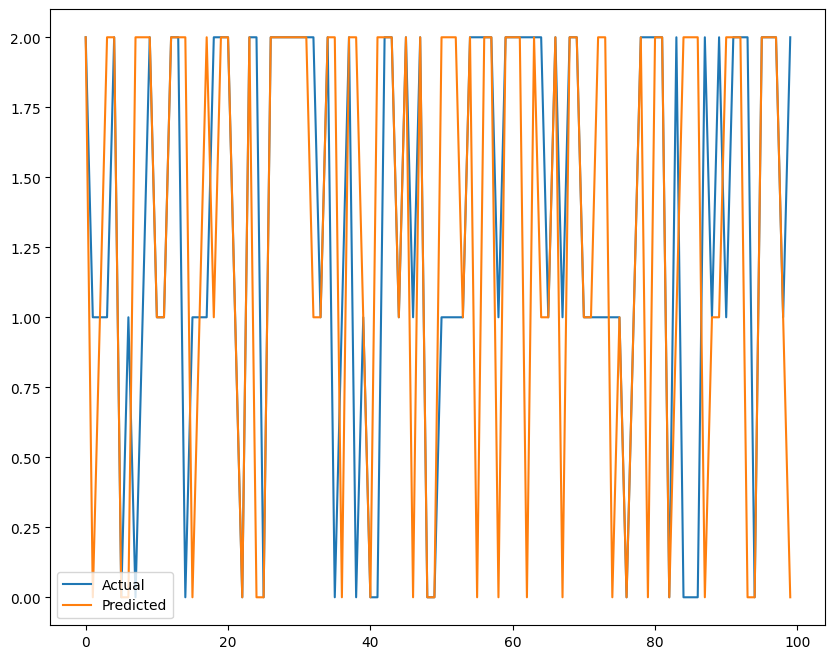

In [ ]:
#Decision tree
max_depth = dt_cv.best_params_['max_depth']
max_features = dt_cv.best_params_['max_features']
dt = dtClassifier(max_features=max_features, max_depth=max_depth)
dt.fit(x_train , y_train)
dt_score = dt.score(x_train , y_train)
dt_score_t = dt.score(x_test , y_test)
y_pred3 = dt.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred3": y_pred3})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# Model use and evaluation
# accuracy
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

# precision
print("Precision:",metrics.precision_score(y_test, y_pred3, average='macro'))

# recall
print("Recall:",metrics.recall_score(y_test, y_pred3, average='macro'))

# f1-score
print("F1-score:",metrics.f1_score(y_test, y_pred3, average='macro'))

Accuracy: 0.6438467807660961
Precision: 0.6176941923613454
Recall: 0.6275838467821232
F1-score: 0.6212304700362997


Accuracy: 0.582722086389568
Precision: 0.5797328723050835
Recall: 0.4760809187363213
F1-score: 0.481785834135245


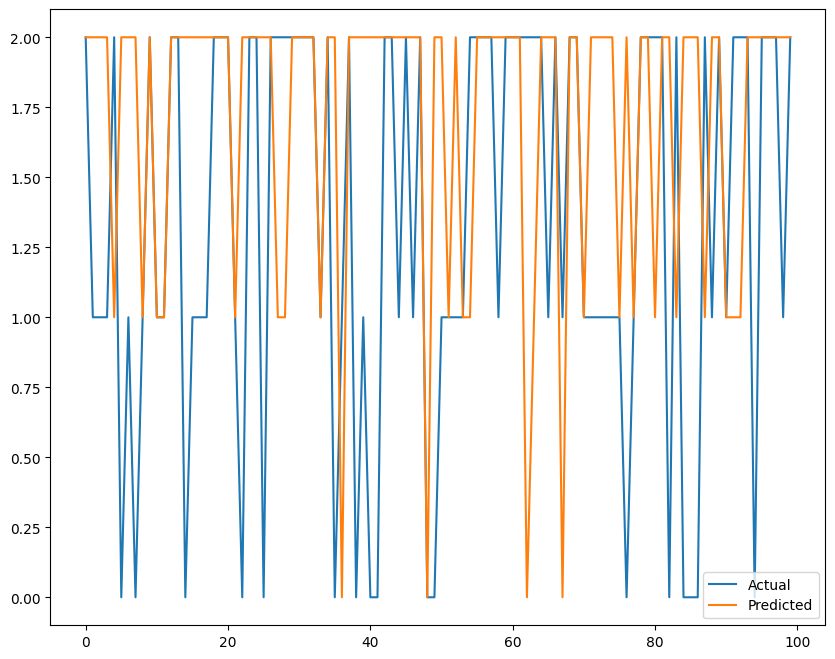

In [ ]:
# Model comparison
# Logistic regression
lgr = lgrClassifier(C = 100)
lgr.fit(x_train , y_train)
lgr_score = lgr.score(x_train , y_train)
lgr_score_t = lgr.score(x_test , y_test)
y_pred1 = lgr.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred1})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# accuracy
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

# precision
print("Precision:",metrics.precision_score(y_test, y_pred1, average='macro'))

# recall
print("Recall:",metrics.recall_score(y_test, y_pred1, average='macro'))

# f1-score
print("F1-score:",metrics.f1_score(y_test, y_pred1, average='macro'))


Accuracy: 0.658516707416463
Precision: 0.6389961942861476
Recall: 0.6221402983950265
F1-score: 0.6293437084730155


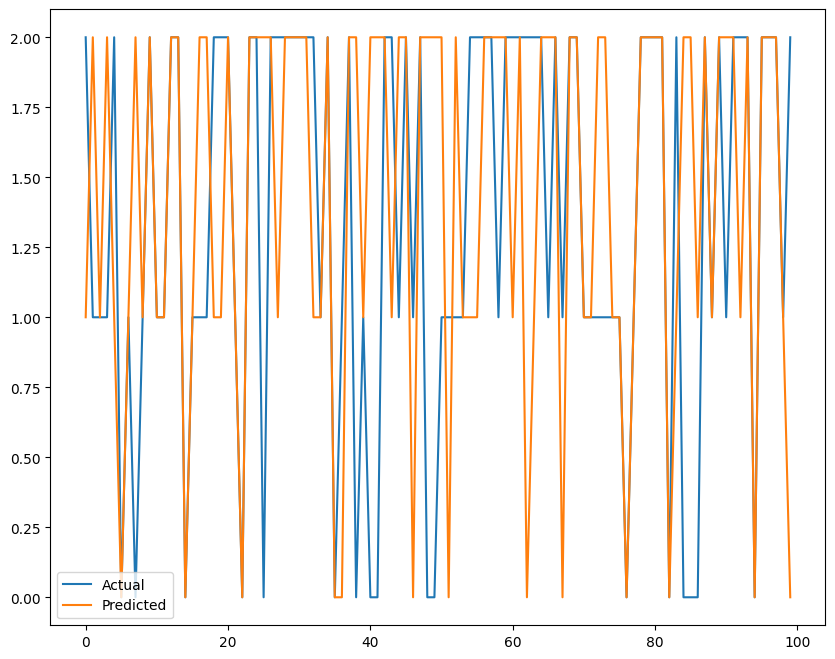

In [ ]:
# KNN
knn = knnClassifier(n_neighbors=5)
knn.fit(x_train , y_train)
knn_score = knn.score(x_train , y_train)
knn_score_t = knn.score(x_test , y_test)
y_pred2 = knn.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred2": y_pred2})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# accuracy
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

# precision
print("Precision:",metrics.precision_score(y_test, y_pred2, average='macro'))

# recall
print("Recall:",metrics.recall_score(y_test, y_pred2, average='macro'))

# f1-score
print("F1-score:",metrics.f1_score(y_test, y_pred2, average='macro'))


Accuracy: 0.700081499592502
Precision: 0.6735929041935694
Recall: 0.6841841913280681
F1-score: 0.6783453844874962


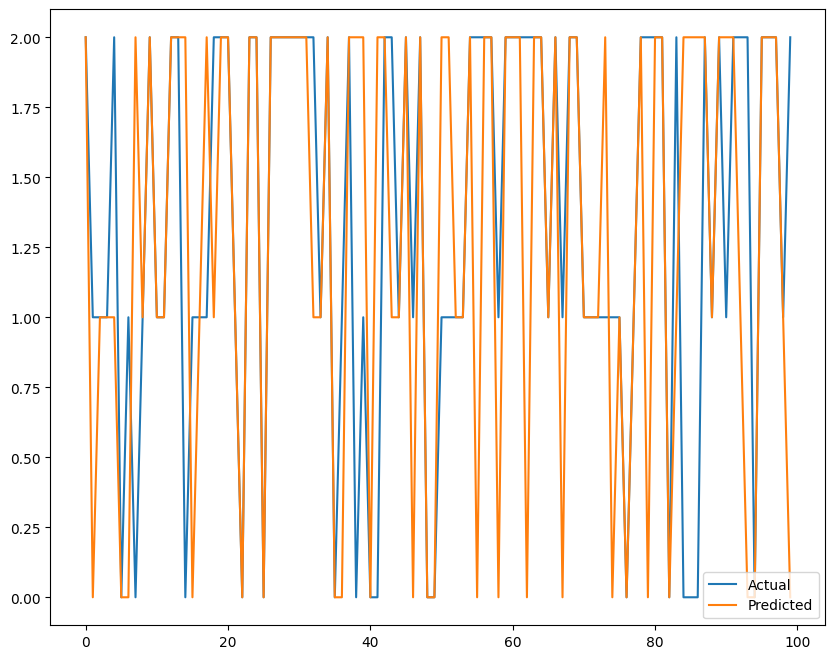

In [ ]:
# Random forest
rf = rfClassifier(max_features= 14, max_depth= 8)
rf.fit(x_train , y_train)
rf_score = rf.score(x_train , y_train)
rf_score_t = rf.score(x_test , y_test)
y_pred4 = rf.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred4": y_pred4})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# accuracy
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

# precision
print("Precision:",metrics.precision_score(y_test, y_pred4, average='macro'))

# recall
print("Recall:",metrics.recall_score(y_test, y_pred4, average='macro'))

# f1-score
print("F1-score:",metrics.f1_score(y_test, y_pred4, average='macro'))